In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/work/insurance.csv')
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [8]:
df.shape

(1338, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df.duplicated().sum()

1

In [12]:
df.drop_duplicates().sum()


age                                                     52440
sex         femalemalemalemalemalefemalefemalefemalemalefe...
bmi                                                 40997.035
children                                                 1465
smoker      yesnonononononononononoyesnonoyesnonononoyesno...
region      southwestsoutheastsoutheastnorthwestnorthwests...
charges                                       17754185.427659
dtype: object

<AxesSubplot: xlabel='charges', ylabel='Density'>

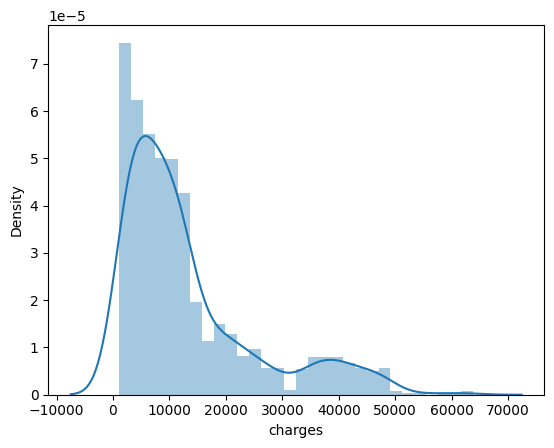

In [15]:
#CHeck the dist of target
sns.distplot(df['charges'])

<AxesSubplot: xlabel='bmi', ylabel='Density'>

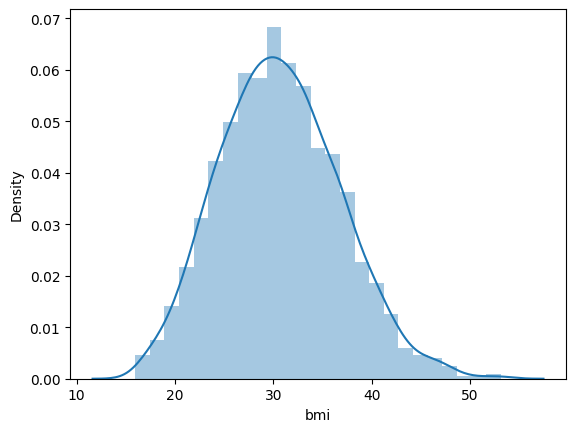

In [17]:
sns.distplot(df['bmi'])

<AxesSubplot: xlabel='count', ylabel='smoker'>

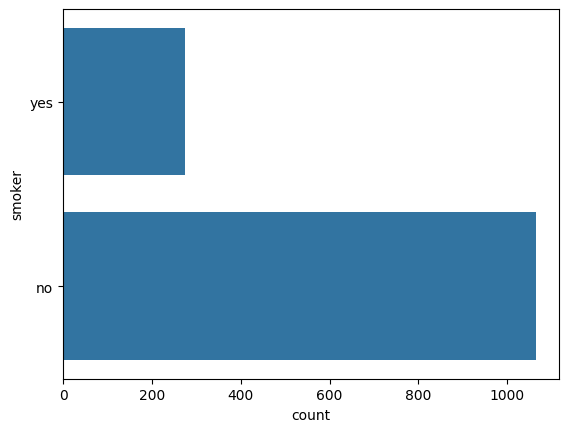

In [19]:
sns.countplot(df['smoker'])

In [20]:
df = df.join(pd.get_dummies(df.smoker).astype(int))
df.head()

,age,sex,bmi,children,smoker,region,charges,no,yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [21]:
df = df.join(pd.get_dummies(df.sex).astype(int))
df = df.drop(['smoker'],axis=1)
df.head()

,age,sex,bmi,children,region,charges,no,yes,female,male
0,19,female,27.900,0,southwest,16884.92400,0,1,1,0
1,18,male,33.770,1,southeast,1725.55230,1,0,0,1
2,28,male,33.000,3,southeast,4449.46200,1,0,0,1
3,33,male,22.705,0,northwest,21984.47061,1,0,0,1
4,32,male,28.880,0,northwest,3866.85520,1,0,0,1


In [22]:
df = df.drop(['sex'],axis=1)
df = df.join(pd.get_dummies(df.region).astype(int))
df.head()

,age,bmi,children,region,charges,no,yes,female,male,northeast,northwest,southeast,southwest
0,19,27.900,0,southwest,16884.92400,0,1,1,0,0,0,0,1
1,18,33.770,1,southeast,1725.55230,1,0,0,1,0,0,1,0
2,28,33.000,3,southeast,4449.46200,1,0,0,1,0,0,1,0
3,33,22.705,0,northwest,21984.47061,1,0,0,1,0,1,0,0
4,32,28.880,0,northwest,3866.85520,1,0,0,1,0,1,0,0


In [23]:
df = df.drop(['region'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   bmi        1338 non-null   float64
 2   children   1338 non-null   int64  
 3   charges    1338 non-null   float64
 4   no         1338 non-null   int64  
 5   yes        1338 non-null   int64  
 6   female     1338 non-null   int64  
 7   male       1338 non-null   int64  
 8   northeast  1338 non-null   int64  
 9   northwest  1338 non-null   int64  
 10  southeast  1338 non-null   int64  
 11  southwest  1338 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 125.6 KB


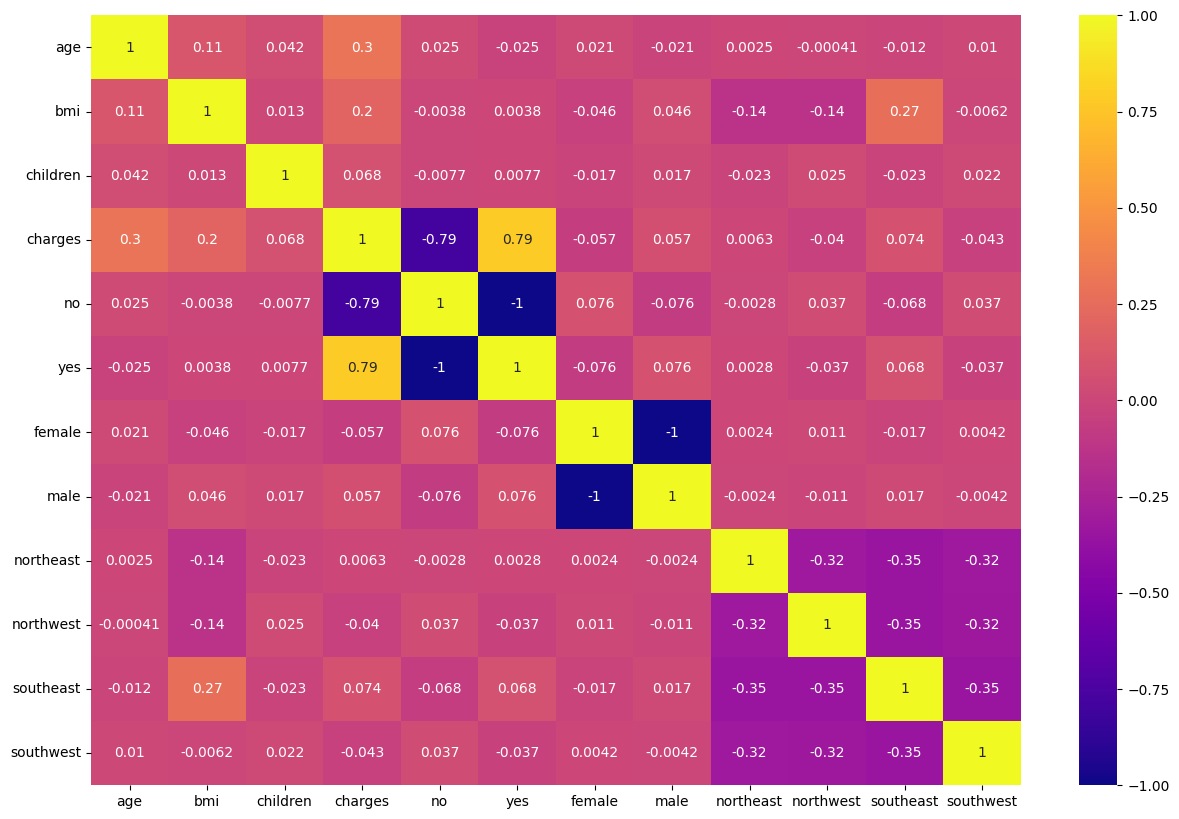

In [29]:
#plt.figure(fig_size=(15,10))

corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cbar=True,cmap='plasma')
plt.show()

In [31]:
!pip install catboost==1.2.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 14.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [33]:
!pip install lightgbm==4.3.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 106.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [34]:
#Now split the data into x and y 
x = df.drop(['charges'],axis=1)
y = df['charges']

#Now split into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#Scaling
#feature scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

#model selection
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
import lightgbm as lgbm
from sklearn.gaussian_process import GaussianProcessRegressor


lr = LinearRegression()
r = Ridge()
l = Lasso()
en = ElasticNet()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
adb = AdaBoostRegressor()
xgb = XGBRegressor()
knn = KNeighborsRegressor()
svr = SVR()
cat = CatBoostRegressor()
lgb =lgbm.LGBMRegressor()
gpr = GaussianProcessRegressor()

#Fittings
lr.fit(x_train_scaled,y_train)
r.fit(x_train_scaled,y_train)
l.fit(x_train_scaled,y_train)
en.fit(x_train_scaled,y_train)
rf.fit(x_train_scaled,y_train)
gb.fit(x_train_scaled,y_train)
adb.fit(x_train_scaled,y_train)
xgb.fit(x_train_scaled,y_train)
knn.fit(x_train_scaled,y_train)
svr.fit(x_train_scaled,y_train)
cat.fit(x_train_scaled,y_train)
lgb.fit(x_train_scaled,y_train)
gpr.fit(x_train_scaled,y_train)

In [35]:
#preds
lrpred = lr.predict(x_test_scaled)
rpred = r.predict(x_test_scaled)
lpred = l.predict(x_test_scaled)
enpred = en.predict(x_test_scaled)
rfpred = rf.predict(x_test_scaled)
gbpred = gb.predict(x_test_scaled)
adbpred = adb.predict(x_test_scaled)
xgbpred = xgb.predict(x_test_scaled)
knnpred = knn.predict(x_test_scaled)
svrpred = svr.predict(x_test_scaled)
catpred = cat.predict(x_test_scaled)
lgbpred = lgb.predict(x_test_scaled)
gprpred = gpr.predict(x_test_scaled)

#Evaluations
from sklearn.metrics import r2_score,mean_absolute_error
lrr2 = r2_score(y_test,lrpred)
rr2 = r2_score(y_test,rpred)
lr2 = r2_score(y_test,lpred)
enr2 = r2_score(y_test,enpred)
rfr2 = r2_score(y_test,rfpred)
gbr2 = r2_score(y_test,gbpred)
adbr2 = r2_score(y_test,adbpred)
xgbr2 = r2_score(y_test,xgbpred)
knnr2 = r2_score(y_test,knnpred)
svrr2 = r2_score(y_test,svrpred)
catr2 = r2_score(y_test,catpred)
lgbr2 = r2_score(y_test,lgbpred)
gprr2 = r2_score(y_test,gprpred)

print('LINEAR REG ',lrr2)
print('RIDGE ',rr2)
print('LASSO ',lr2)
print('ELASTICNET',enr2)
print('RANDOM FOREST ',rfr2)
print('GB',gbr2)
print('ADABOOST',adbr2)
print('XGB',xgbr2)
print('KNN',knnr2)
print('SVR',svrr2)
print('CAT',catr2)
print('LIGHTGBM',lgbr2)
print('GUASSIAN PROCESS',gprr2)

LINEAR REG  0.7842802608662011
RIDGE  0.7835661821408255
LASSO  0.7835697199613387
ELASTICNET 0.7334331967866503
RANDOM FOREST  0.8595774212590717
GB 0.8792541595680764
ADABOOST 0.8350589767924198
XGB 0.8553703082233771
KNN 0.7991987134855247
SVR -0.06894401159271046
CAT 0.8641649939663094
LIGHTGBM 0.8636067930829995
GUASSIAN PROCESS -10402.524740072527


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=decaceb9-539d-4df3-a178-908e2ed6e268' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>